## Bayesian Decision Making 2

Let's consider a similar problem also taken from Winkler's "An Introduction to Bayesian Inference and Decision Making":

>A sales manager is asked to forecast the total sales of his division for a forthcoming period of time. He feels that his loss function is linear as a function of the difference between his estimate and the true value, but he also feels that an error of overestimation is three times as serious as an error of underestimation (given that the magnitudes of the errors are equal). He feels this way because his superiors will criticize him if the division does worse than he predicts, but they will be happy if the division does better than predicted and will be less likely to be concerned about an error in the predicting. If his actual judgments can be represented by a normal distribution with mean 50,000 and a standard deviation 10,000, what value should he report as his forecast of sales?

In this problem there is a clear cost function involved with making an estimate. If the sales manager overestimates his division's sales for the forthcoming period, his loss would be 3 times an underestimate of the same error. Based only on this fact, we should expect the appropriate decision to error on the side of an underestimate (less than the mean). The first part of this code should be very familiar as the fundamentals from the previous problem apply to this problem as well.

Note: There is a cost function in the previous example as well! It is incorporated in the difference between the sold and unsold product.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean  = 50000
sigma = 10000
N = 50
D = np.random.normal(mean, sigma, N)

meanD = np.mean(D)
sigmaD = np.sqrt(np.var(D))

h = 500
Range = np.arange(0,2*meanD+h,h)
prob_trueSales = norm.pdf(Range, meanD, sigmaD)*h
prob_t_mat = np.tile(prob_trueSales,(np.size(Range),1)).T

So let's set up both the Cost and Loss functions.
As stated before, if the manager overestimates, his loss is three times more than if he underestimates. Therefore, the cost function follows:  
$\textrm{C}(e,t) = \begin{cases} 3 & e > t \\1 & e\leq t \end{cases}$
where e = estimate, t = true sales  

When setting up the loss function for this problem it is important to remember the sign of the difference between the estimate and the true value of sales tells you whether or not it is an under or overestimate but the loss function should be based on the error in the prediction. This should make sense as the sales manager should still want to have some accuracy in his prediction. Therefore, a completely linear loss function would incorporate the sign and the smallest value would be the negative value with the highest magnitude. For in the case of this loss function, $\textrm{L}(e,t) = (e-t) \times \textrm{C}(e,t)$, the minimum loss would be to predict zero sales which should clearly not be the correct answer. So, by taking the absolute value we can incorporate a Loss function based on the magnitude of the error of the prediction and get a more appropriate Loss function:  
$\textrm{L}(e,t) = \textrm{abs}(e-t) \times \textrm{C}(e,t)$

If we incorporate this Loss function as we did in the previous example, then find the Expected Loss for each action, we can find our minimum loss and determine the appropriate estimate.

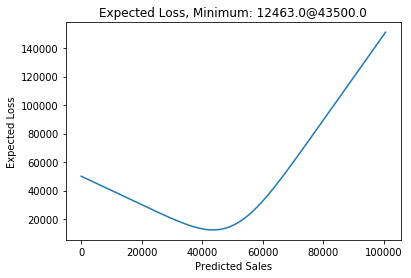

In [4]:
i = 0
L = np.zeros([np.size(Range),np.size(Range)])
for t in Range:
    j = 0
    for e in Range:
        diff = e-t
        C = (3 if (diff>0) else 1)
        L[i,j] = abs(diff)*C
        j += 1
    i += 1

EL = np.sum(np.multiply(L,prob_t_mat), 0)
minInd = np.argmin(EL)
Min = EL[minInd]
Decision = Range[minInd]

plt.figure()
plt.plot(Range, EL)
plt.title('Expected Loss, Minimum: ' + str(round(Min)) + '@' + str(Decision))
plt.xlabel('Predicted Sales')
plt.ylabel('Expected Loss')
plt.show()

As expected the minimum expected loss decision is below the mean. If we vary the cost function, we should see that decision shift with the same dataset.  
Let's redo the loss calculations a few times with various cost ratios and see how it affects our decision.

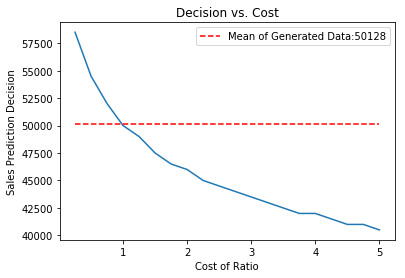

In [3]:
cRange = np.arange(.25,5.25,.25)
k = 0
L = np.zeros([np.size(Range),np.size(Range),np.size(cRange)]) #expanding to a 3dimensional matrix
Min = np.zeros([np.size(cRange), 1])
Decision = np.zeros([np.size(cRange), 1])
for c in cRange:
    i = 0
    for t in Range:
        j = 0
        for e in Range:
            diff = e-t
            C = (c if (diff>0) else 1)
            L[i,j,] = abs(diff)*C
            j += 1
        i += 1
    EL = np.sum(np.multiply(L[:,:,k],prob_t_mat), 0)
    minInd = np.argmin(EL)
    Min[k] = EL[minInd]
    Decision[k] = Range[minInd]
    k += 1

plt.figure()
decPlot = plt.plot(cRange, Decision)
meanPlot = plt.plot(cRange,np.repeat(meanD,np.size(cRange)), 'r--')
plt.title('Decision vs. Cost')
plt.xlabel('Cost of Ratio')
plt.ylabel('Sales Prediction Decision')
plt.legend(meanPlot, ['Mean of Generated Data:'+str(int(meanD))])
plt.show()

As we can see in the plot above, when the ratio favors underestimation (higher cost for overestimate), we will predict below the mean as an overestimation is more serious. Of course when the ratio favors overestimation (this could potentially be appropriate if we spun the question to be a predicition of costs instead of sales), then we predict above the mean. As expected our prediction will be at the mean when neither underestimation or overestimation is favored.